# Testing Feedforward Neural Network


In [1]:
import math

import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import mnist

from NeuralNet import NeuralNet

plt.rcParams["figure.dpi"] = 600

2023-04-05 17:15:27.662138: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Basic Test (If sum of `N` random numbers between 0 - 1 is greater than `N / 2`)


**Specifying Network layout and training/testing data**


In [2]:
NPL = [4, 10, 10, 10, 1]
train_x = np.array([np.random.rand(NPL[0]) for _ in range(5000)], dtype=np.float32)
train_y = np.array([int(np.sum(x) > NPL[0] / 2) for x in train_x], dtype=np.float32)

test_x = np.random.rand(NPL[0]).astype(np.float32)
test_y = np.array(int(np.sum(test_x) > NPL[0] / 2), dtype=np.float32)


**Training Network**


In [3]:
net = NeuralNet(NPL=NPL, learning_rate=0.3)
net.train(train_x, train_y, epochs=10)


Epoch[0]: Loss = 0.25549228571206334
Epoch[1]: Loss = 0.2534929443076253
Epoch[2]: Loss = 0.25299865881353617
Epoch[3]: Loss = 0.25280630538463594
Epoch[4]: Loss = 0.2526921636223793
Epoch[5]: Loss = 0.25256183412075045
Epoch[6]: Loss = 0.2522291146695614
Epoch[7]: Loss = 0.2501901696115732
Epoch[8]: Loss = 0.1501013722995888
Epoch[9]: Loss = 0.03368651373824416


**Testing Network**


In [4]:
net.activations[0] = test_x
net.forward_prop()
test_loss = net.calculate_loss(test_y)

print(
    f"Sum of testing data ({np.sum(test_x)}) is {'greater' if test_y else 'less'} than {NPL[0] / 2}"
)
print(f"Expected output is {test_y}")
print(f"Network predicted: {net.activations[-1][0]}, with a loss of {test_loss}")


Sum of testing data (2.213249444961548) is greater than 2.0
Expected output is 1.0
Network predicted: 0.9590156674385071, with a loss of 0.0016797154676169157


### MNIST Test


**Loading MNIST Data**


In [5]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()

# Flattening image and converting pixels to 0.0 -> 1.0
train_X = (train_X / 255).reshape((60000, 784)).astype(np.float32)
test_X = (test_X / 255).reshape((10000, 784)).astype(np.float32)

# One-hot encoding labels
train_y = np.eye(10, dtype=np.float32)[train_y]
test_y = np.eye(10, dtype=np.float32)[test_y]


**Training Network**


In [6]:
NPL = [784, 100, 10]

net = NeuralNet(NPL=NPL, learning_rate=0.3)
net.train(train_X, train_y, epochs=10)


Epoch[0]: Loss = 0.012384714071428458
Epoch[1]: Loss = 0.0065464863179283145
Epoch[2]: Loss = 0.005017807262794945
Epoch[3]: Loss = 0.004129884169144734
Epoch[4]: Loss = 0.0035346319258866663
Epoch[5]: Loss = 0.0030772849655502587
Epoch[6]: Loss = 0.002714811868525433
Epoch[7]: Loss = 0.0024379527552911436
Epoch[8]: Loss = 0.0021712032797989423
Epoch[9]: Loss = 0.0019728307946413


**Testing Network**


Expected output is [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
Network predicted: [1.24711887e-05 1.39715456e-04 9.93010104e-01 3.12530063e-02
 5.19085745e-07 2.88059776e-09 2.85370465e-08 2.08288964e-09
 3.22761276e-04 1.05587886e-10], with loss of 0.000102573289739117


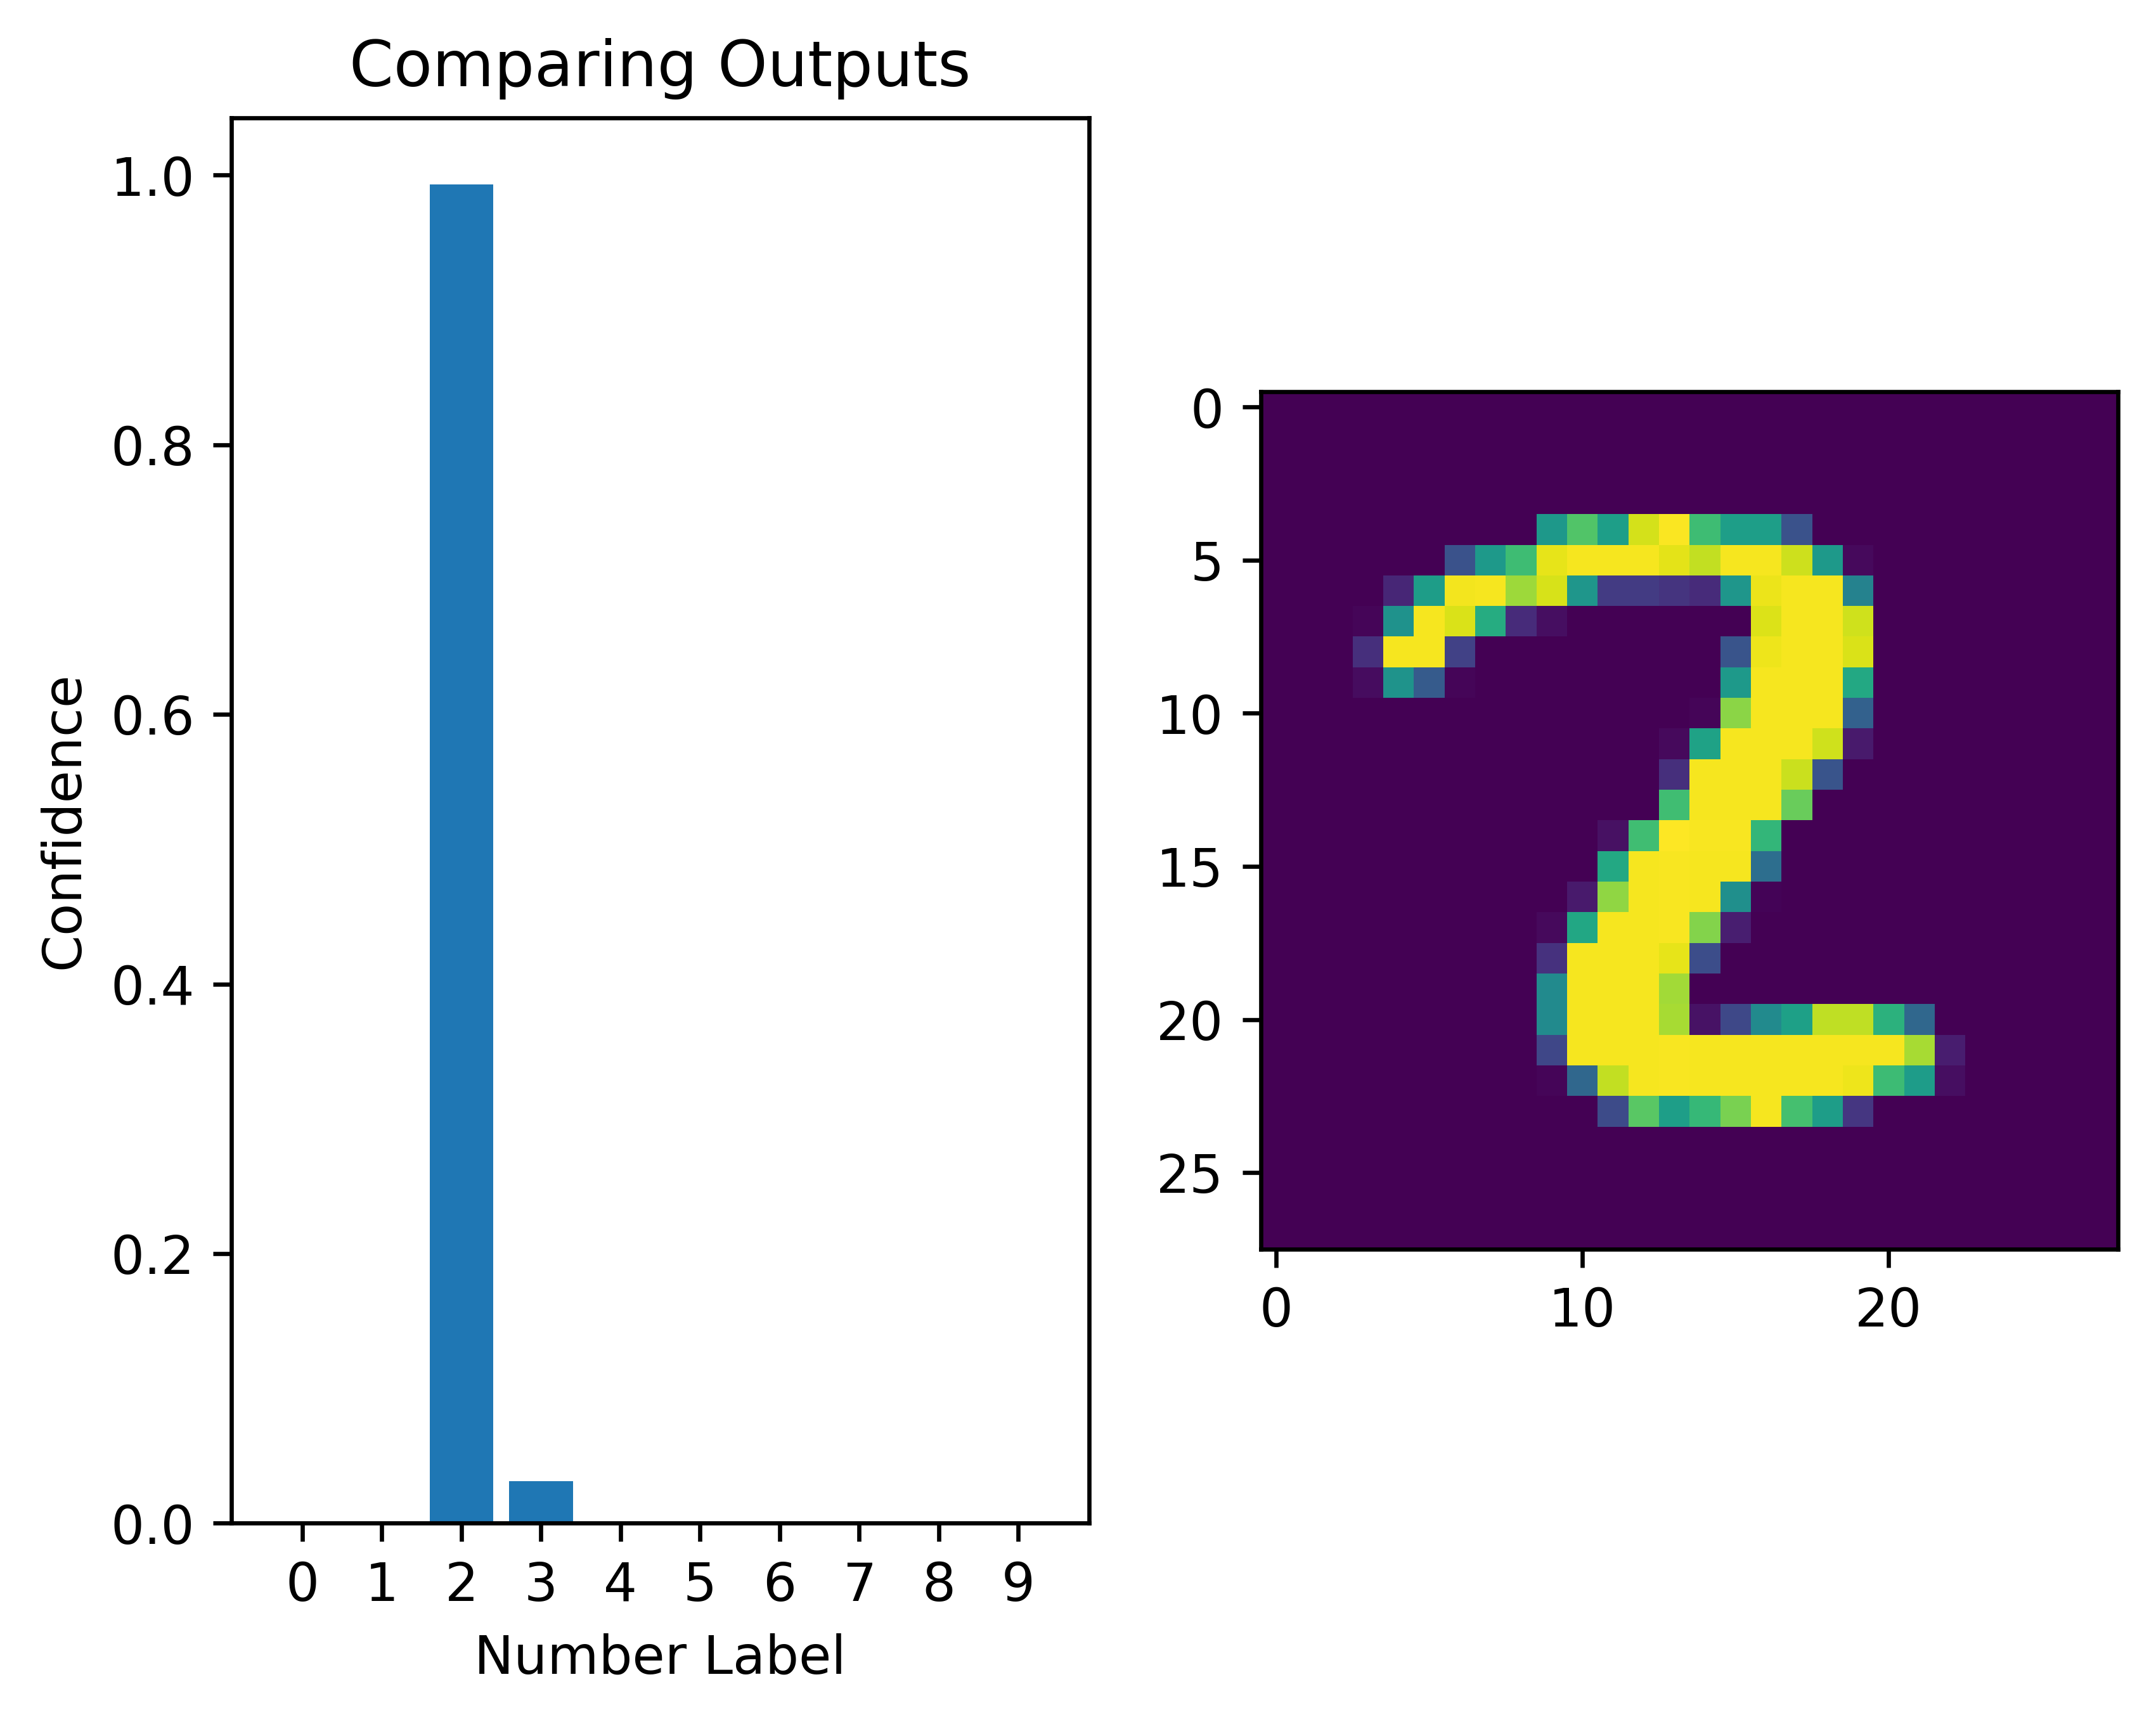

In [7]:
TEST_EXAMPLE: int = 4274

net.activations[0] = test_X[TEST_EXAMPLE]
net.forward_prop()
test_loss = net.calculate_loss(test_y[TEST_EXAMPLE])

fig, axes = plt.subplots(1, 2)
axes[0].bar(x=[str(x) for x in range(10)], height=net.activations[-1])
axes[0].set_title("Comparing Outputs")
axes[0].set_ylabel("Confidence")
axes[0].set_xlabel("Number Label")

axes[1].imshow(test_X[TEST_EXAMPLE].reshape((28, 28)))

print(f"Expected output is {test_y[TEST_EXAMPLE]}")
print(f"Network predicted: {net.activations[-1]}, with loss of {test_loss}")


**Plotting Weights**

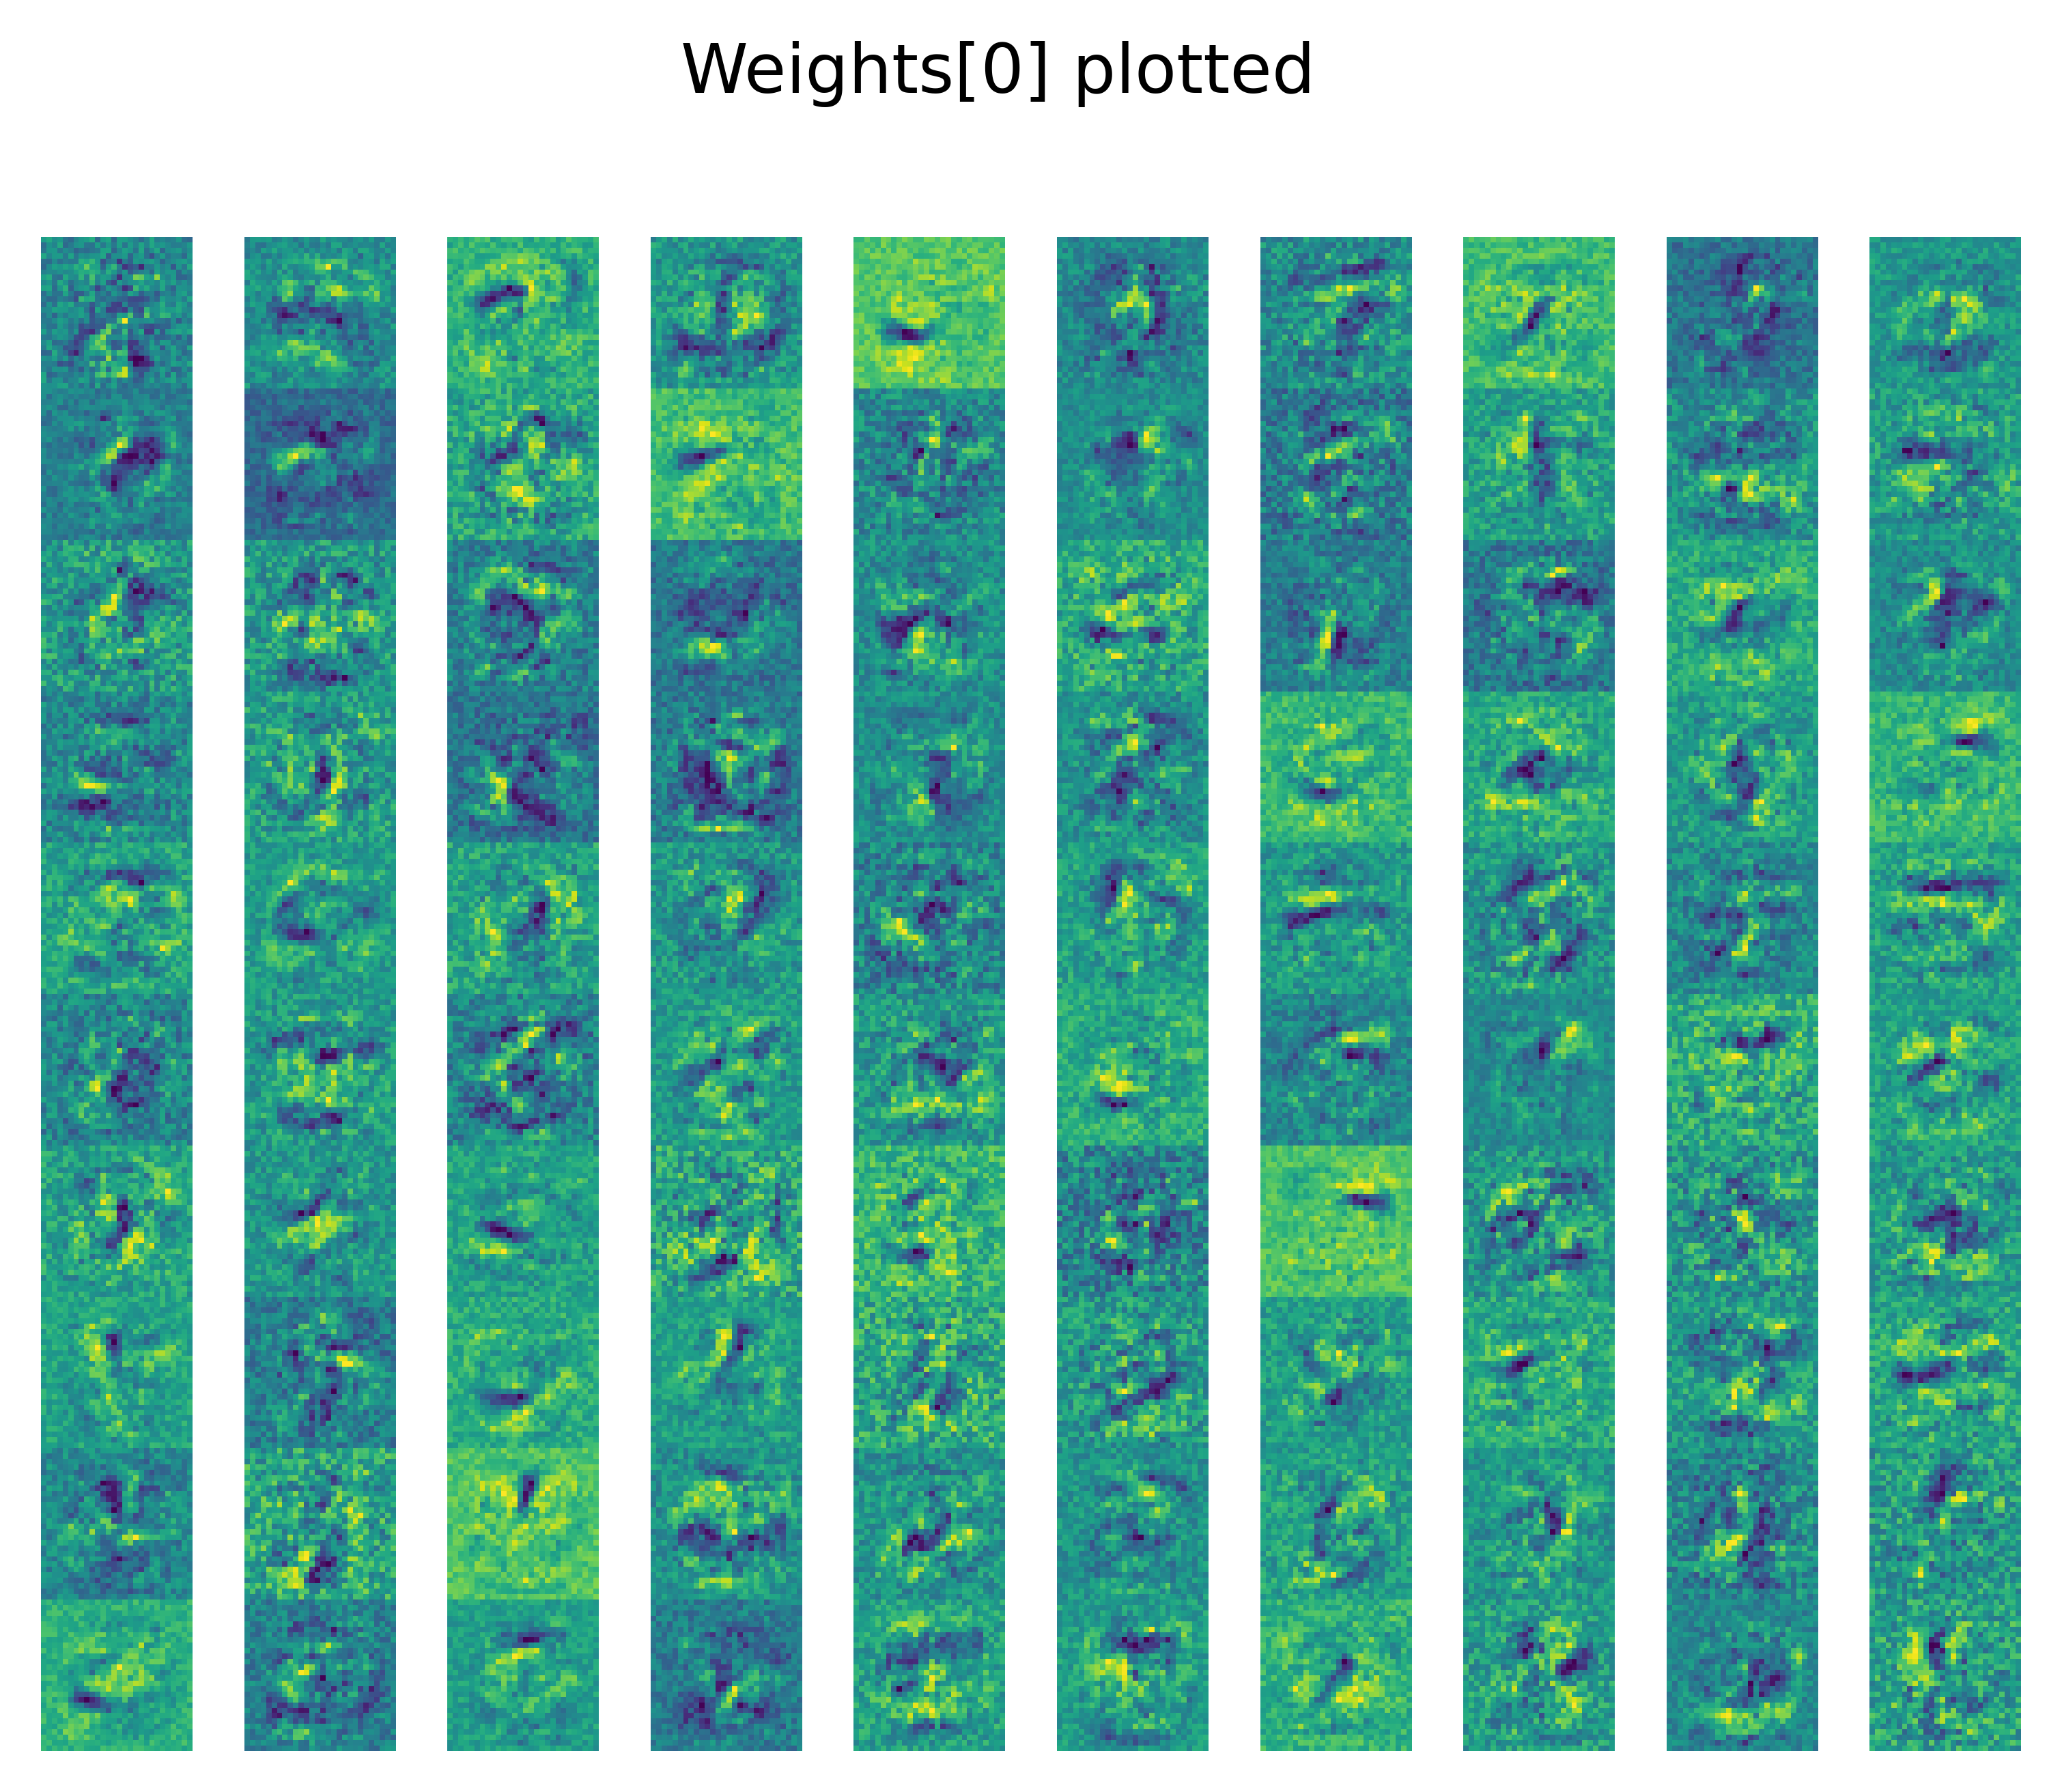

In [8]:
root_im = math.sqrt(net.weights[0].shape[1])
im_rows, im_cols = (math.floor(root_im), math.ceil(root_im))

curr_row = 0
curr_col = 0

fig, axes = plt.subplots(im_rows, im_cols)

fig.suptitle("Weights[0] plotted")

for weights in range(net.weights[0].shape[1]):
    if curr_col == im_cols:
        curr_col = 0
        curr_row += 1

    ax = axes[curr_row][curr_col]
    ax.axis("off")
    ax.imshow(net.weights[0][:, weights].reshape((28, 28)))

    curr_col += 1

fig.subplots_adjust(wspace=0, hspace=0)